<a href="https://colab.research.google.com/github/Sriya987/machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df.shape

(20640, 8)

In [3]:
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
df['HousePrice']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

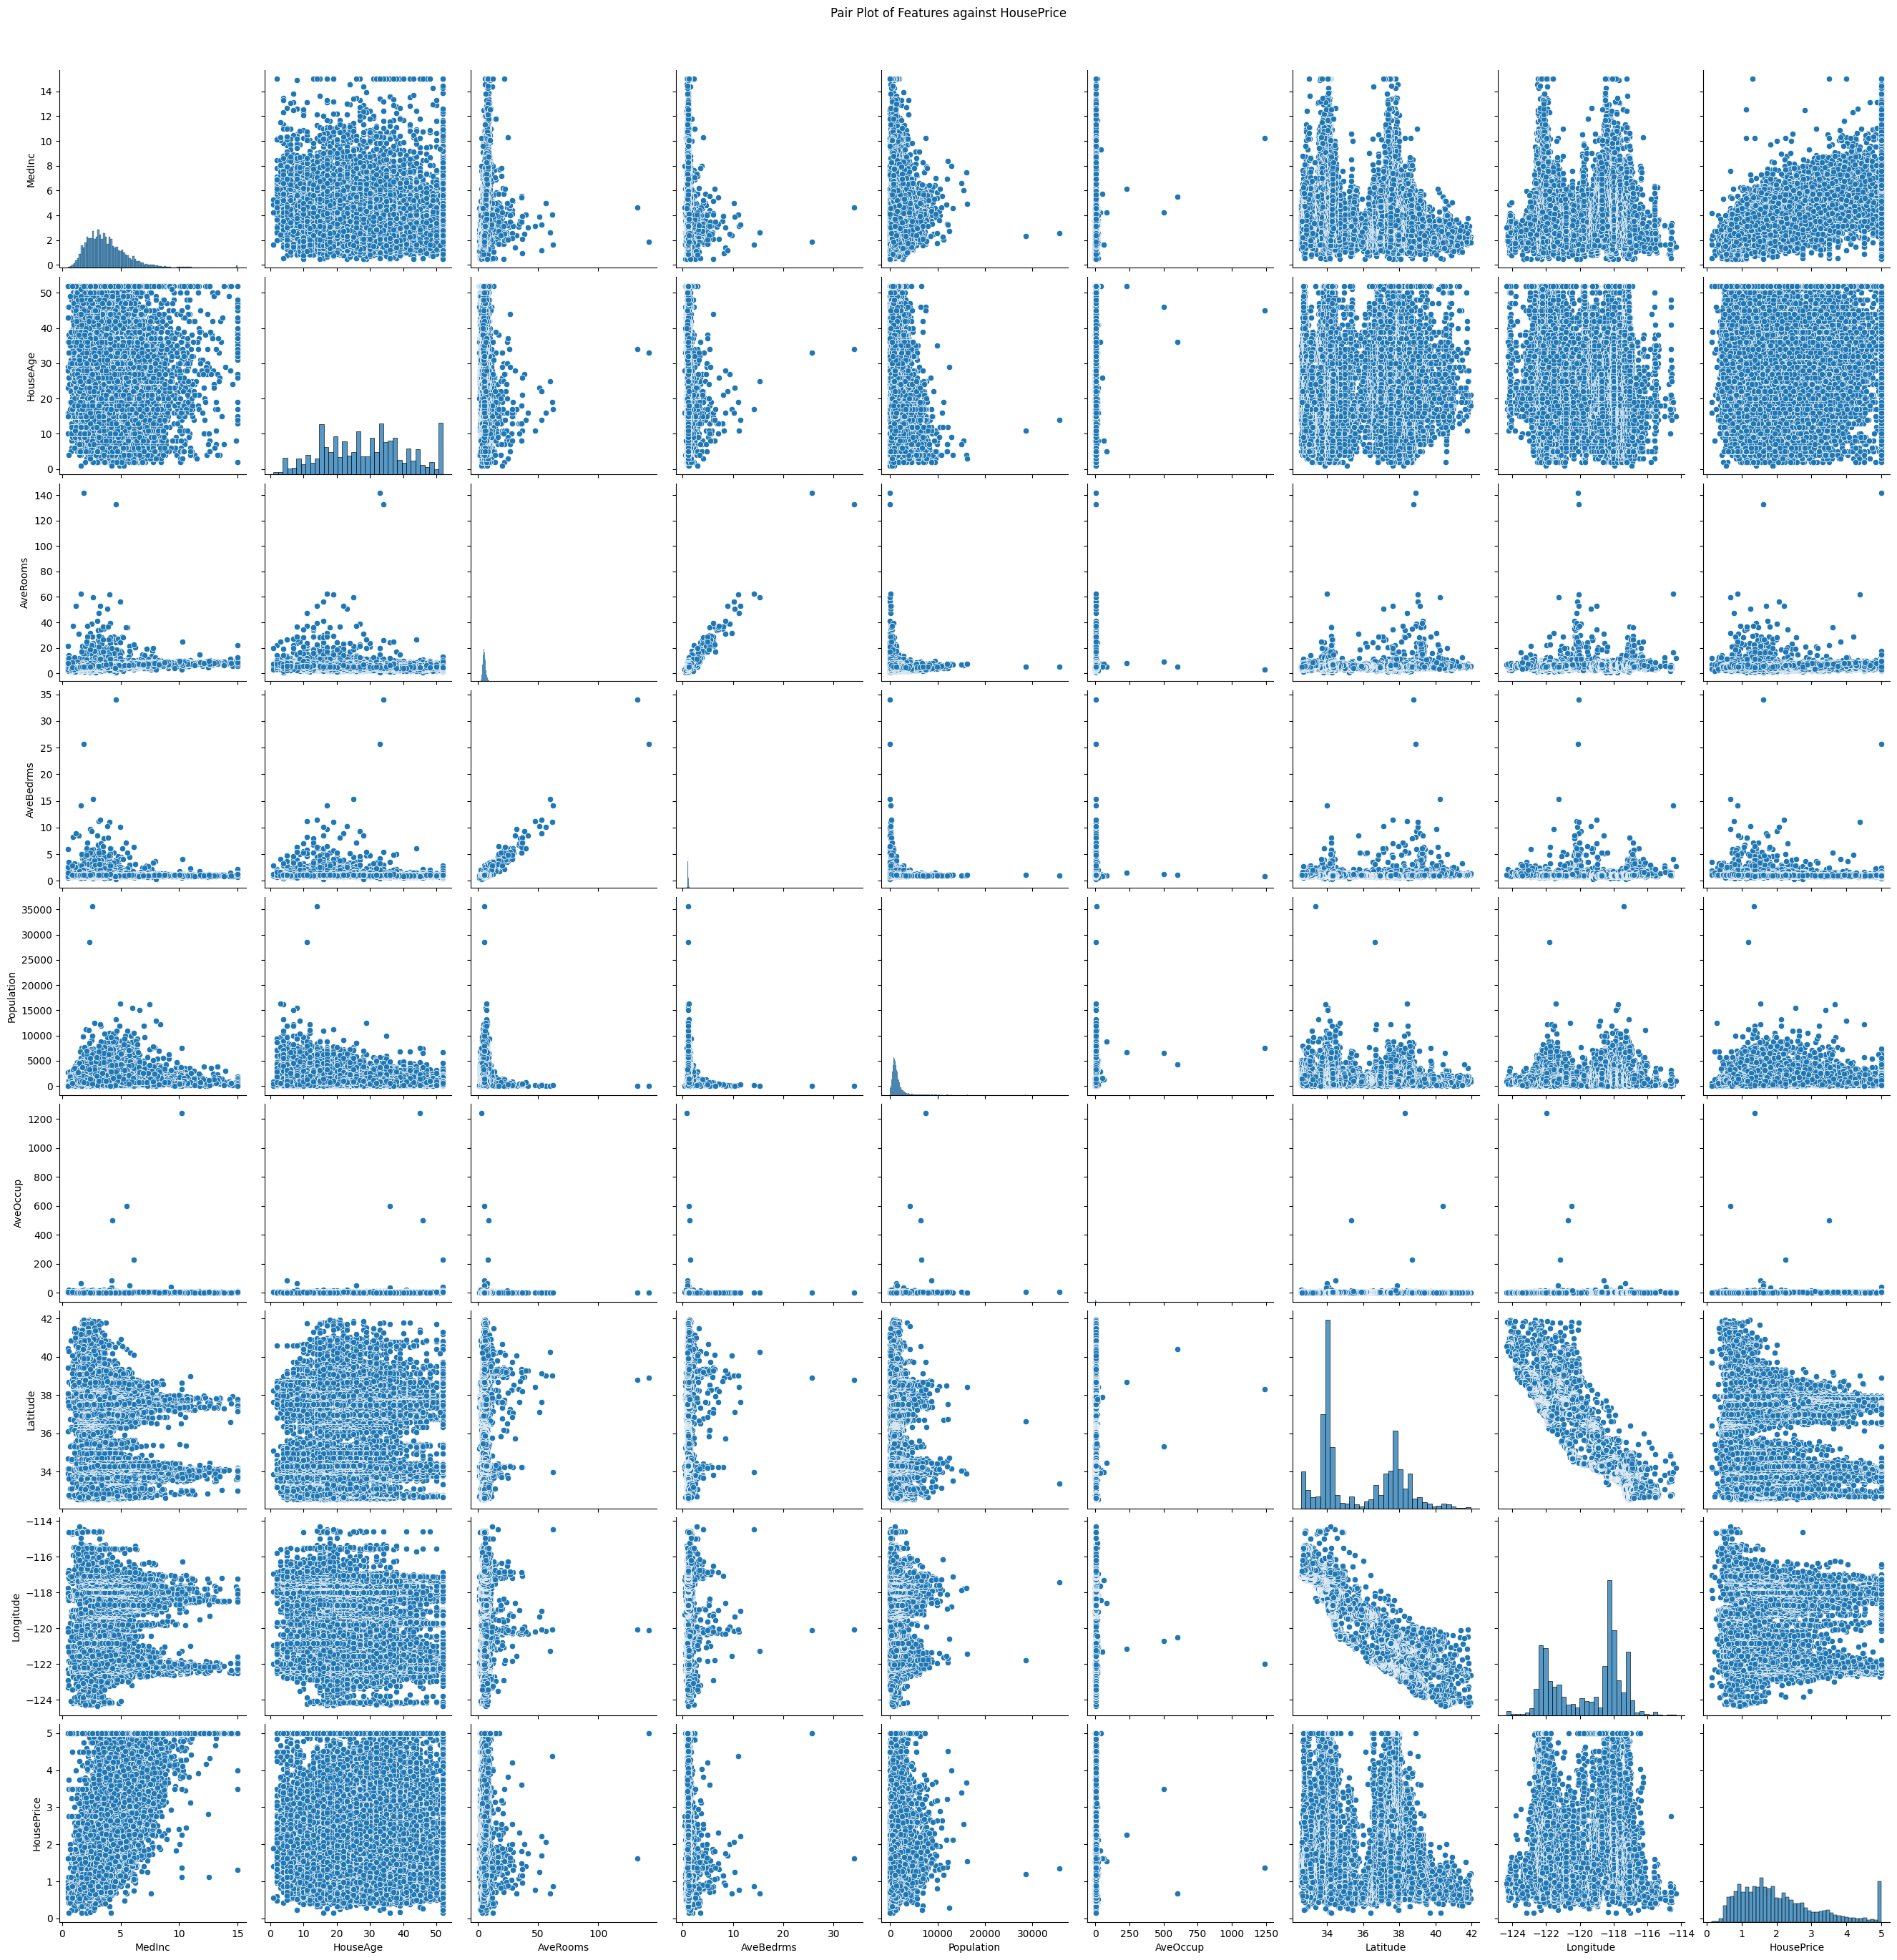

In [9]:
sns.pairplot(df,height=3)
plt.suptitle('Pair Plot of Features against HousePrice', y=1.02)
plt.show()

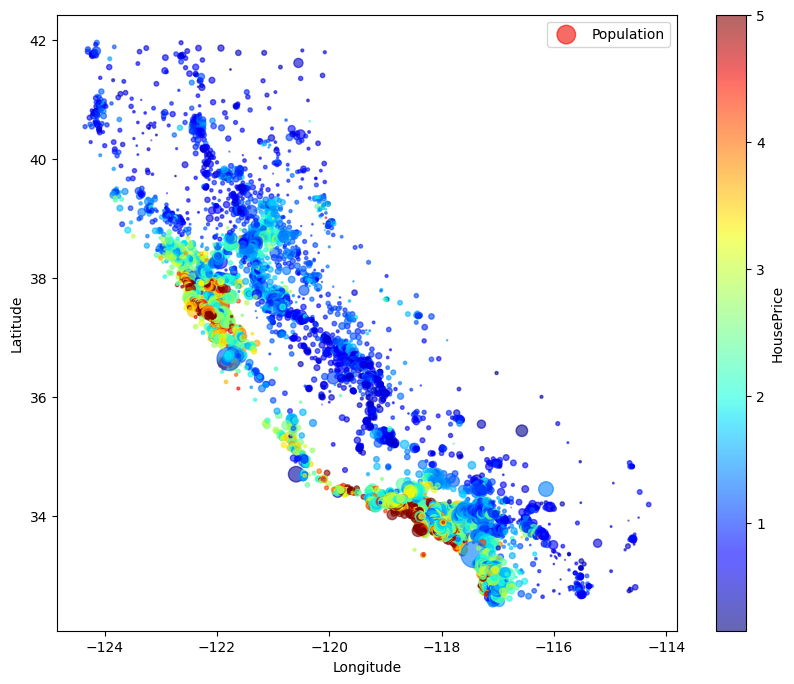

In [15]:
df.plot(
      kind="scatter",
      x="Longitude",
      y="Latitude",
      alpha=0.6,
      s=df['Population']/100,
      label="Population",
      c="HousePrice",
      cmap="jet",
      figsize=(10,8)
  )
plt.show()

In [16]:
corr=df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
HousePrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


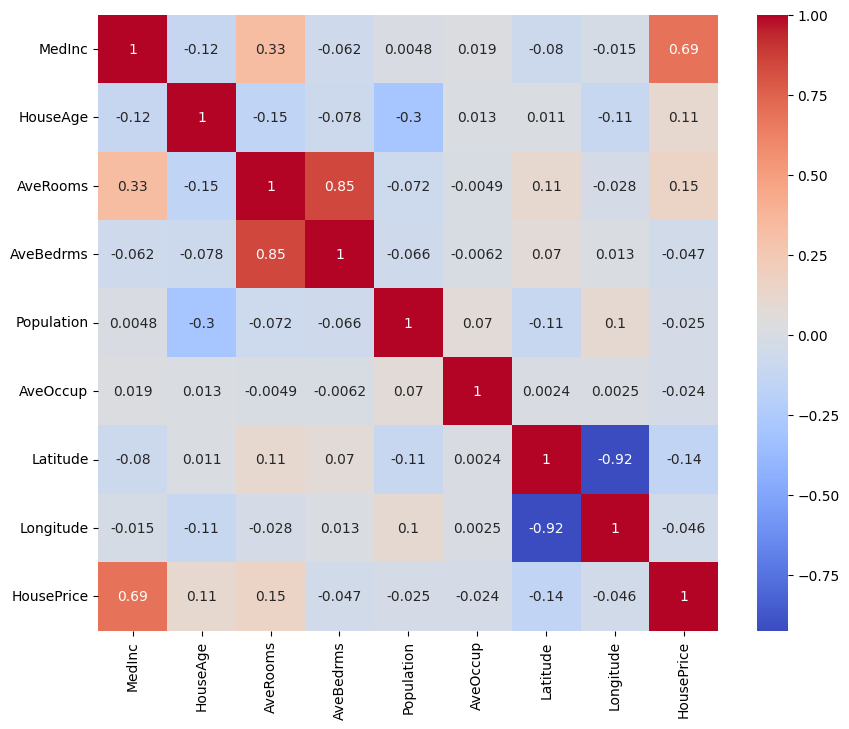

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [18]:
corr['HousePrice'].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

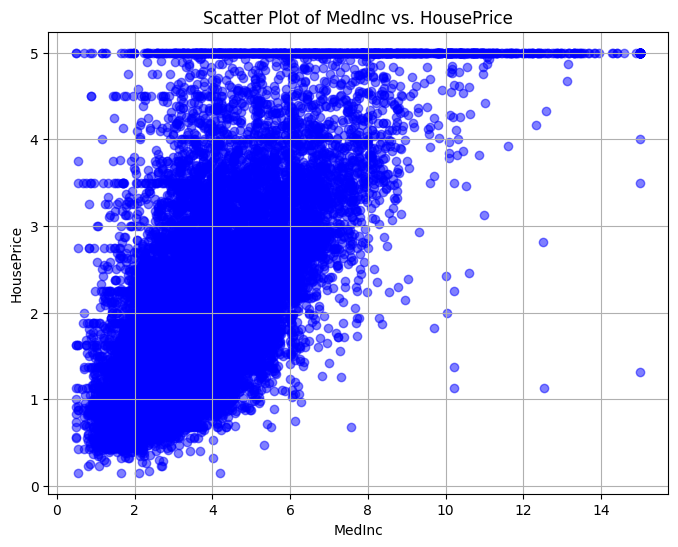

In [20]:
# Extract 'MedInc' and 'HousePrice' columns
medinc = df['MedInc']
houseprice = df['HousePrice']

# Create a Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(medinc,houseprice,alpha=0.5,color='blue')
plt.title('Scatter Plot of MedInc vs. HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set the features as the DataFrame, except the target variable
df_vif = df.drop('HousePrice', axis=1)
df_vif = df_vif.apply(pd.to_numeric, errors='coerce')

# # Calculate the variance inflation factor (VIF) for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [24]:
df=df.drop(['Latitude','Longitude'],axis=1)

In [25]:
cols_to_convert=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df[cols_to_convert]=df[cols_to_convert].apply(pd.to_numeric,errors='coerce')
df['HousePrice']=df['HousePrice'].apply(pd.to_numeric,errors='coerce')

In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [27]:
labelencoder=LabelEncoder()
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x,y)

[[8.32520000e+00 4.10000000e+01 6.98412698e+00 1.02380952e+00
  3.22000000e+02 2.55555556e+00]
 [8.30140000e+00 2.10000000e+01 6.23813708e+00 9.71880492e-01
  2.40100000e+03 2.10984183e+00]
 [7.25740000e+00 5.20000000e+01 8.28813559e+00 1.07344633e+00
  4.96000000e+02 2.80225989e+00]
 ...
 [1.70000000e+00 1.70000000e+01 5.20554273e+00 1.12009238e+00
  1.00700000e+03 2.32563510e+00]
 [1.86720000e+00 1.80000000e+01 5.32951289e+00 1.17191977e+00
  7.41000000e+02 2.12320917e+00]
 [2.38860000e+00 1.60000000e+01 5.25471698e+00 1.16226415e+00
  1.38700000e+03 2.61698113e+00]] [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [28]:
x[:,1]=labelencoder.fit_transform(x[:,1])

In [29]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = ct.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
linearregressor=LinearRegression()
linearregressor.fit(x_train,y_train)
y_pred=linearregressor.predict(x_test)
print(y_test,y_pred)

[1.369 2.413 2.007 ... 1.286 2.595 1.676] [2.15622515 2.79965262 2.18143221 ... 1.44629946 2.69886418 2.6964481 ]


In [32]:
linearregressor.coef_

array([-4.25320716e-02, -2.14980933e-01, -1.98183132e-01, -3.33209348e-01,
       -3.22640094e-01, -2.33798186e-01, -3.45754124e-01, -3.38543135e-01,
       -3.69394905e-01, -3.23508989e-01, -2.23184106e-01, -2.46641656e-01,
       -1.85083355e-01, -1.97213023e-01, -2.02800394e-01, -1.54712559e-01,
       -1.54091747e-01, -1.11757387e-01, -5.36397130e-02, -5.37872521e-02,
       -3.45240577e-02,  4.34773889e-02, -1.39932597e-02,  1.26655949e-02,
        5.28807469e-02, -7.30475487e-03,  1.28259563e-02,  8.20982891e-02,
        5.71286247e-02,  4.55997198e-02,  1.09208562e-01,  4.85946997e-02,
        2.49159727e-02,  5.71802654e-02,  1.65085651e-02,  2.10352285e-02,
        8.07621781e-02,  7.09353471e-02,  2.14280124e-01,  2.20176332e-01,
        2.15196001e-01,  7.09533160e-02,  1.92059655e-01,  2.68259008e-01,
        2.23906403e-01,  2.45182240e-01,  8.13193382e-02,  3.29798232e-01,
        3.62671195e-01,  2.69989632e-01,  2.49743125e-01,  6.81926440e-01,
        5.30973862e-01, -

In [33]:
linearregressor.intercept_

0.04712209448094651

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5303075561448498

In [35]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [36]:
mean_absolute_error(y_test,y_pred)

0.5755436081789977

In [23]:
mean_absolute_percentage_error(y_test,y_pred)

0.22332482710360713

In [37]:
mean_squared_error(y_test,y_pred)

0.6124577647451313

In [38]:
print(y_test)
print(y_pred)

[1.369 2.413 2.007 ... 1.286 2.595 1.676]
[2.15622515 2.79965262 2.18143221 ... 1.44629946 2.69886418 2.6964481 ]
